In [27]:
import numpy as np
import random
from matplotlib import pyplot as plt
import astropy
from scipy import stats, interpolate

In [28]:
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution

In [29]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

In [30]:
print(z)

[1.8246 1.8373 1.1985 ... 1.7592 1.4597 1.8671]


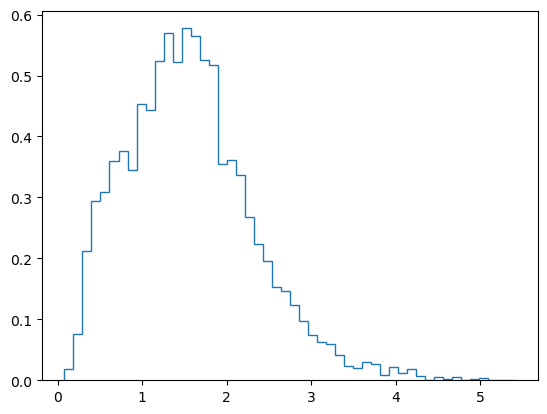

In [31]:
plt.hist(z,bins=50,histtype='step',density=True,label='original data')
plt.show()



### Cloning by Rejection Sampling

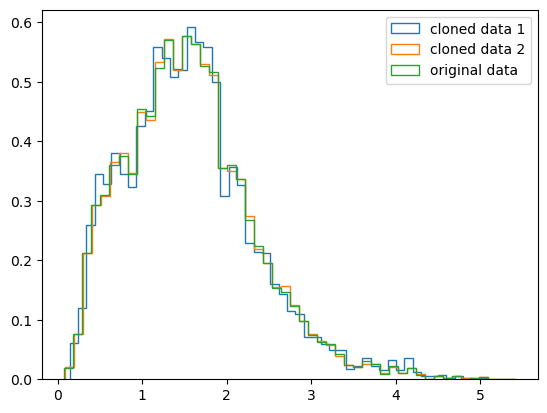

In [32]:
counts, bins = np.histogram(z, bins=100,density=True)
maxh = counts.max() # find the maximum

disth = stats.rv_histogram((counts,bins))
# It takes the counts (heights) and bins (edges) and creates an object (disth) that allows you
# to sample from a distribution that follows the shape of the original histogram.
# This object can now be treated like any other probability distribution, from which you can 
# draw random samples or evaluate the PDF (probability density function).

# Manual Monte Carlo Sampling from the Histogram
N = 100000 # trials
q = np.random.uniform(-10, 30, N) # proposed points
u = np.random.uniform(0, maxh, N) # uniform draws
mask = u<=disth.pdf(q) # assess whether u <= q(x_i)
monte_carlo = q[mask] # reject all points that don't pass, using masking

# using manual monte carlo:
plt.hist(monte_carlo, bins=50, density=True,histtype='step',label='cloned data 1');

# using disth directly: 
plt.hist(disth.rvs(size=N),bins=50,density=True,histtype='step',label='cloned data 2');

# original data
plt.hist(z,bins=50,histtype='step',density=True,label='original data')

plt.legend();



### Cloning by Inverse Transform

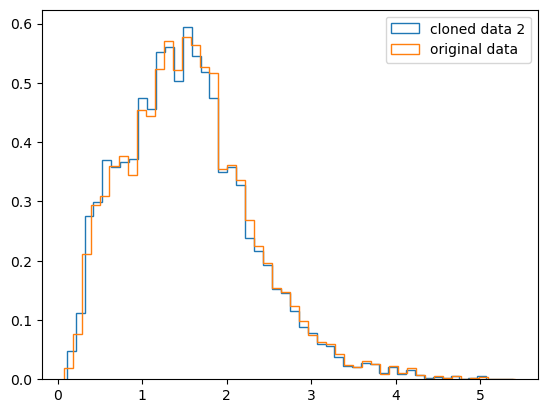

In [33]:
counts, bins = np.histogram(z, bins=100,density=True)
bin_mids = (bins[1:] + bins[:-1]) / 2 # mid location of bins

#integral approximated by a cumulative sum

cdf = np.cumsum(counts) / np.sum(counts) # very simply cumulative sum

inverse_of_cdf_fun = interpolate.interp1d(cdf,bin_mids)

# sampling
N = 100000 # trials
u = np.random.uniform(min(cdf),max(cdf), N)  # random.uniform(0,1) give interpolation range error. Why?

x = inverse_of_cdf_fun(u)


# cloned distribution: 
plt.hist(x,bins=50,density=True,histtype='step',label='cloned data 2')

# original data
plt.hist(z,bins=50,histtype='step',density=True,label='original data')

plt.legend()
plt.show()

# Cosmology

In [34]:
astropy.cosmology.Planck18

FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)